# EE655000 Machine Learning HW1

In [1]:
import csv
import random
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

## Part 1. Split the train and test data

(1) Classify the given data into three catagories respectively. Suffle them and save 18 of each as testing data and rest of them as training data.

In [2]:
TEST_NUM = 18
w1, w2, w3 = [], [], []
with open('Wine.csv') as fh:
    wine_data = list(csv.reader(fh))
    for wine in wine_data:
        wine = [int(wine[0])] + list(map(np.double, wine[1:]))
        if wine[0] == 1:
            w1.append(wine)
        elif wine[0] == 2:
            w2.append(wine)
        else:
            w3.append(wine)
random.shuffle(w1)
random.shuffle(w2)
random.shuffle(w3)
testing_data = w1[:TEST_NUM] + w2[:TEST_NUM] + w3[:TEST_NUM]
training_data = w1[TEST_NUM:] + w2[TEST_NUM:] + w3[TEST_NUM:]
train_w1, train_w2, train_w3 = np.array(w1[TEST_NUM:]), np.array(w2[TEST_NUM:]), np.array(w3[TEST_NUM:])
train_len1, train_len2, train_len3 = len(train_w1), len(train_w2), len(train_w3)
priors = [train_len1 / len(training_data), train_len2 / len(training_data), train_len3 / len(training_data)]


(2) Save the data into csv files.

In [3]:
with open('test.csv', 'w', newline='') as fh2:
    writer = csv.writer(fh2)
    writer.writerows(testing_data)
with open('train.csv', 'w', newline='') as fh3:
    writer = csv.writer(fh3)
    writer.writerows(training_data)

(3) Save the training data (label excluded) into np-arrays.

In [4]:
wine1_data = np.zeros(shape=[train_len1, 13])
wine2_data = np.zeros(shape=[train_len2, 13])
wine3_data = np.zeros(shape=[train_len3, 13])
for i in range(train_len1):
    wine1_data[i] = train_w1[i][1:]
for i in range(train_len2):
    wine2_data[i] = train_w2[i][1:]
for i in range(train_len3):
    wine3_data[i] = train_w3[i][1:]

## Part 2. Calculate posterior probabilities

(1) For each type of wine, obtain `pdf` of each feature.
As for the mean and standard deviation (std) for a particular normal distribution, we obtain them from the training data. For example, we calculate the mean and std of feature 1 on wine 1 using all the `feature 1` value from the data labeled `wine 1`. After this step, we'll get 13 `pdf`s for each wine. That is, there will be 39 `pdf`s in total.

In [5]:
wine1_pdf = []
wine2_pdf = []
wine3_pdf = []
for i in range(13):
    wine1_pdf.append(scipy.stats.norm(np.mean(np.transpose(wine1_data)[i]), np.std(np.transpose(wine1_data)[i])).pdf)
    wine2_pdf.append(scipy.stats.norm(np.mean(np.transpose(wine2_data)[i]), np.std(np.transpose(wine2_data)[i])).pdf)    
    wine3_pdf.append(scipy.stats.norm(np.mean(np.transpose(wine3_data)[i]), np.std(np.transpose(wine3_data)[i])).pdf)
all_pdf = [wine1_pdf, wine2_pdf, wine3_pdf]

(2) Calculate the posteriors in testing data and predict their label.

In [6]:
'''
For each testing data, we calculate the posterior of three kinds of wine. 
Given posterior = prior * likelihood, we set the prior value in advance, which equals to the proportion of each wine in the training data. 
As for likelihood, we get the value from the pdf of normal distribution and multiply them. 
Afterwards, we'll obtain 3 posteriors, and the argmax() of these values is the predicted label of that wine. 
Then, calculate the accuracy according to the ground truth label of each wine.
'''
correct = 0
for wine in testing_data:
    posteriors = np.ones(3)
    for wine_idx in range(3):
        posterior = priors[wine_idx]
        for feature_idx in range(13):
            posterior *= all_pdf[wine_idx][feature_idx](wine[feature_idx + 1])
        posteriors[wine_idx] = posterior
#     print(posteriors, end = '')
#     print(f'predicted class is wine {np.argmax(posteriors) + 1}')
    predict = np.argmax(posteriors) + 1
    if predict == wine[0]:
        correct += 1
# print(correct)
print(f'accuracy = {correct / len(testing_data)}')

accuracy = 0.9444444444444444


## Part 3. Plot visualized result

(1) Plot 2D PCA figure.

13
[[ 1.06197053e+02  2.16645145e+01]
 [ 5.95779531e+02 -1.94529822e+01]
 [ 5.62934248e+01  2.41354183e+01]
 [-4.39968972e+01  2.38639819e+00]
 [ 1.91019609e+02  3.54525821e+00]
 [ 5.36019099e+02  2.59706118e-01]
 [ 3.56054628e+02  5.50371209e+00]
 [ 3.10950153e+02 -3.94434569e+00]
 [ 3.20920803e+02 -8.12327968e+00]
 [ 7.26059340e+02  1.92683903e+00]
 [ 3.70959293e+02 -4.71946758e+00]
 [ 7.11800197e+01  1.49520176e+01]
 [ 2.65986523e+02 -3.92228344e-01]
 [ 4.25861285e+02 -1.44345875e+01]
 [ 6.51088734e+02  5.87396565e+00]
 [ 4.70839609e+02 -1.39170489e+01]
 [ 3.36161872e+02  1.27187316e+01]
 [ 5.86059606e+02  3.66122286e+00]
 [-1.17010324e+02  3.32727674e+00]
 [-3.68966273e+02  7.40128940e+00]
 [-4.41267350e+01 -6.54223503e+00]
 [-5.40956862e+00  4.99360382e+01]
 [-1.62182425e+02 -1.11228537e+01]
 [-3.72198350e+02 -1.05372800e+01]
 [-3.59043087e+02  5.37840091e+00]
 [-4.12108237e+02 -4.06510813e+00]
 [-4.34150018e+02 -7.80567055e+00]
 [-3.78939221e+02  1.15780485e+01]
 [-3.32166611e+02

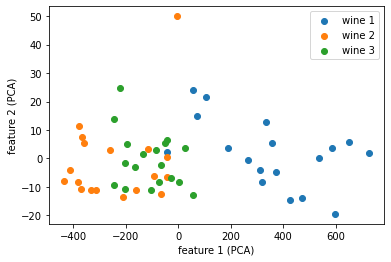

In [15]:
pca = PCA(n_components=2)
X = [data[1:] for data in testing_data]
# print(len(X[0]))
ground_truth = np.array([data[0] for data in testing_data])
# print(ground_truth==3)
X_prime = pca.fit_transform(X)
# print(X_prime)
# print(X_prime[ground_truth == label, 0])
fig = plt.figure()
ax = fig.add_subplot()
for index in [1, 2, 3]:
    ax.scatter(X_prime[ground_truth == index, 0], X_prime[ground_truth == index, 1], label = f'wine {index}')
ax.set_xlabel('feature 1 (PCA)')
ax.set_ylabel('feature 2 (PCA)')
plt.legend()
plt.savefig('PCA1.png')
plt.show()

(2) Plot 3D PCA figure. 

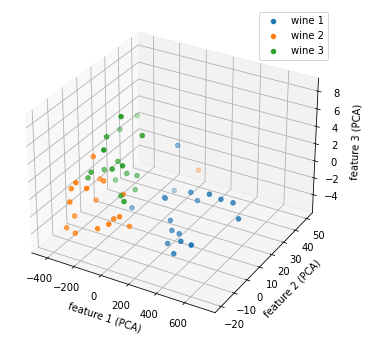

In [8]:
pca2 = PCA(n_components=3)
X_prime = pca2.fit_transform(X)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
for index in [1, 2, 3]:
    ax.scatter(X_prime[ground_truth == index, 0], X_prime[ground_truth == index, 1], X_prime[ground_truth == index, 2], label = f'wine {index}')
ax.set_xlabel('feature 1 (PCA)')
ax.set_ylabel('feature 2 (PCA)')
ax.set_zlabel('feature 3 (PCA)')
plt.legend()
plt.savefig('PCA2.png')
plt.show()

## Part 4. Discussion on the effect of prior distribution

I tried to change the number of training data for each type in order to observe the effect of different prior distribution. The accuracy, however, still remains extremely high (about 95~100 %) no matter how I change the prior. The reason is because `posterior` equals to `prior` times `likelihood`. In this given dataset, we multiply the prior to 13 likelihoods, which greatly reduces the effect of prior.  
In other words, if we want to observe the effect of prior distribution, we should lower the effect of likelihood. That is, if the number of features is small enough (like 2 or 3), prior will dominant the value of posterior, and we may be able to see the effect of different prior distributions. 